## Dimensionality Reduction using TSNE on MNIST Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

In [2]:
mnist_data=pd.read_csv('train/train.csv')

In [3]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=mnist_data['label']

In [5]:
d=mnist_data.drop('label',axis=1)

In [6]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(d.shape)

(42000, 784)


In [8]:
print(l.shape)

(42000,)


### 1. Column Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
stand_data=StandardScaler().fit_transform(d)
print(stand_data.shape)

(42000, 784)


### 2. TSNE from Scikit-Learn 

In [10]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
# default perpexity=30 (neighbourhood selection distance)
# default learning rate=200
# default iterations=1000
tsne_data=model.fit_transform(stand_data)

In [14]:
print(tsne_data.shape)
new_cord=np.vstack((tsne_data.T,l)).T
print(new_cord.shape)

(42000, 2)
(42000, 3)


In [16]:
data_frame=pd.DataFrame(data=new_cord,columns=("1st pca","2nd pca","labels"))
print(data_frame.head())

     1st pca    2nd pca  labels
0 -42.808105 -34.291531     1.0
1  11.889394  49.377102     0.0
2 -61.311604   1.495121     1.0
3  19.965647 -59.478912     4.0
4  18.459185  57.017117     0.0


C:\Users\vingo\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


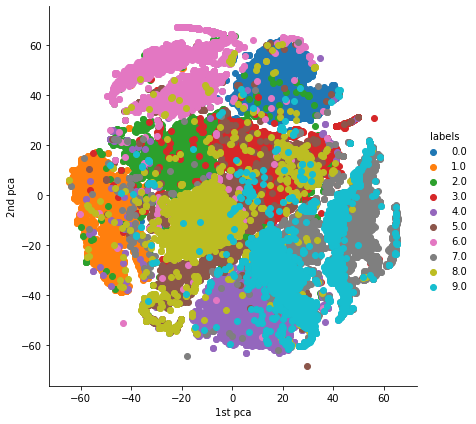

In [17]:
import seaborn as sns
sns.FacetGrid(data_frame,hue='labels',size=6).map(plt.scatter,'1st pca','2nd pca').add_legend()
plt.show()

#### Increasing the iterations to 5000 and perpexity to 50

In [19]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_data=model.fit_transform(stand_data)

In [20]:
print(tsne_data.shape)
new_cord=np.vstack((tsne_data.T,l)).T
print(new_cord.shape)

(42000, 2)
(42000, 3)


In [21]:
data_frame=pd.DataFrame(data=new_cord,columns=("1st pca","2nd pca","labels"))
print(data_frame.head())

      1st pca     2nd pca  labels
0 -105.546600    9.747372     1.0
1   27.681015  108.368805     0.0
2  -98.364975  -69.985001     1.0
3  -18.516144 -119.779175     4.0
4   25.129671  131.244995     0.0


C:\Users\vingo\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


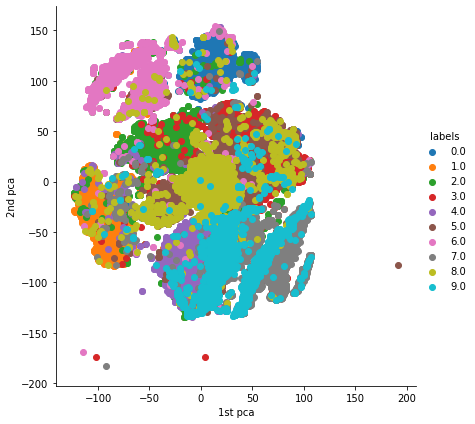

In [22]:
import seaborn as sns
sns.FacetGrid(data_frame,hue='labels',size=6).map(plt.scatter,'1st pca','2nd pca').add_legend()
plt.show()

## Observations
1. Increasing perplexity from 30 to 50 didn't impact the results much
2. Increasing the iterations to 5000 lead to clear stable classification
